In [2]:
import numpy as np
np.set_printoptions(suppress=True)

## Temperature:

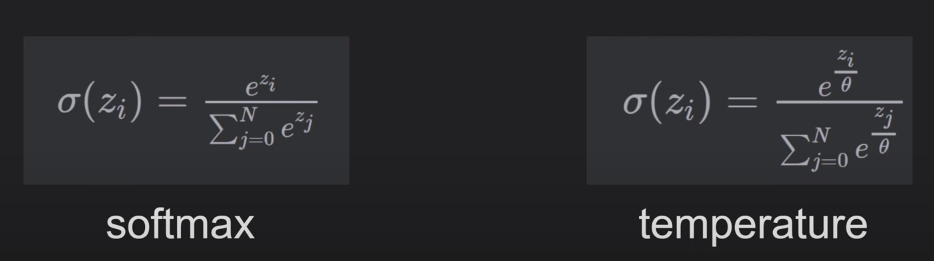

In [3]:
def softmax(logits,temperature=0.0):
    if temperature == 0.0:
        logits = np.asarray(logits)
        exponential_logits = np.exp(logits)
        probs = exponential_logits / np.sum(exponential_logits)
        return probs
    else:
        logits = np.asarray(logits) / (temperature + 0.002) # some added value to avoid divide by 1.00 (1.00 + 0.002)
        exponential_logits = np.exp(logits)
        probs = exponential_logits / np.sum(exponential_logits)
        return probs

In [104]:
a = 1
np.exp(a)

2.718281828459045

In [105]:
a = 1/0.9
np.exp(a)

3.037731777517483

In [13]:
def temperature_random_sampling(logits,words,temperature=0.0,print_words=False):
    probs = softmax(logits,temperature)
    if print_words:
        print('Logit to Prob:',list(map(list, zip(words, probs))))
    random_samp_index = np.random.choice(range(len(logits)),p=probs)
    print('Sampled word:',words[random_samp_index])

In [99]:
logits = [1.0 , 3.0 , 2.0, 9.0 , 8.0 , 4.0]
words = ['I' , 'boy' , 'hello' , 'LLM' , 'NLP' , 'N-gram']

In [107]:
temperature_random_sampling(logits,words,temperature=0.0,print_words=True)

Logit to Prob: [['I', 0.00024338100884697562], ['boy', 0.0017983559277846399], ['hello', 0.000661578173740764], ['LLM', 0.7255085622166656], ['NLP', 0.26689968443336354], ['N-gram', 0.004888438239598594]]
Sampled word: LLM


In [92]:
temperature = 1.0
for i in range(10):
    print('----------')
    temperature_random_sampling(logits,words,temperature)

----------
Sampled word: NLP
----------
Sampled word: LLM
----------
Sampled word: NLP
----------
Sampled word: N-gram
----------
Sampled word: N-gram
----------
Sampled word: boy
----------
Sampled word: LLM
----------
Sampled word: NLP
----------
Sampled word: LLM
----------
Sampled word: NLP


## TOP_P

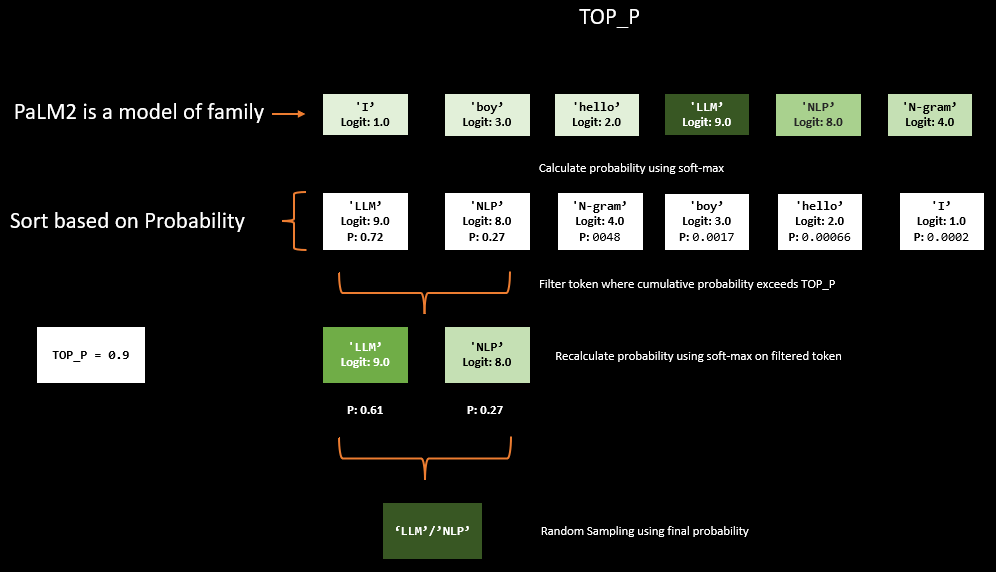

Top P:
Tokens are sampled from most probabale tokens that collectively have a probability values >=p

1. Tokens sorted by probability
2. Select only tokens for which culmilitive probability exceeds P
3. Recalculate probability by normalizing the probability
4. Randomly sample using the final normalized probability

In [66]:
def top_p_indexes(probs,top_p):
    sorted_index = np.argsort(probs)[::-1]
    cum_prob = 0.0
    selected_index = []
    for i in sorted_index:
        if cum_prob <= top_p:
            selected_index.append(i)
            cum_prob += probs[i]
        else:
            break
    return selected_index

In [67]:
def top_p_sampling(logits,words,top_p,print_words=False):
    probs = softmax(logits)
    selected_index = top_p_indexes(probs,top_p)
    top_p_prob = softmax(probs[selected_index])
    if print_words:
        selected_words = []
        for i in selected_index:
            selected_words.append(words[i])
        print('Top P words and Normalized Prob:',list(map(list, zip(selected_words, top_p_prob))))
    random_samp_index = np.random.choice(selected_index,p=top_p_prob)
    print('Sampled word:',words[random_samp_index])

In [68]:
top_p = 0.90

In [69]:
top_p_sampling(logits,words,top_p,print_words=True)

Top P words and Normalized Prob: [['LLM', 0.6126841114435158], ['NLP', 0.3873158885564842]]
Sampled word: NLP


## TOP_K

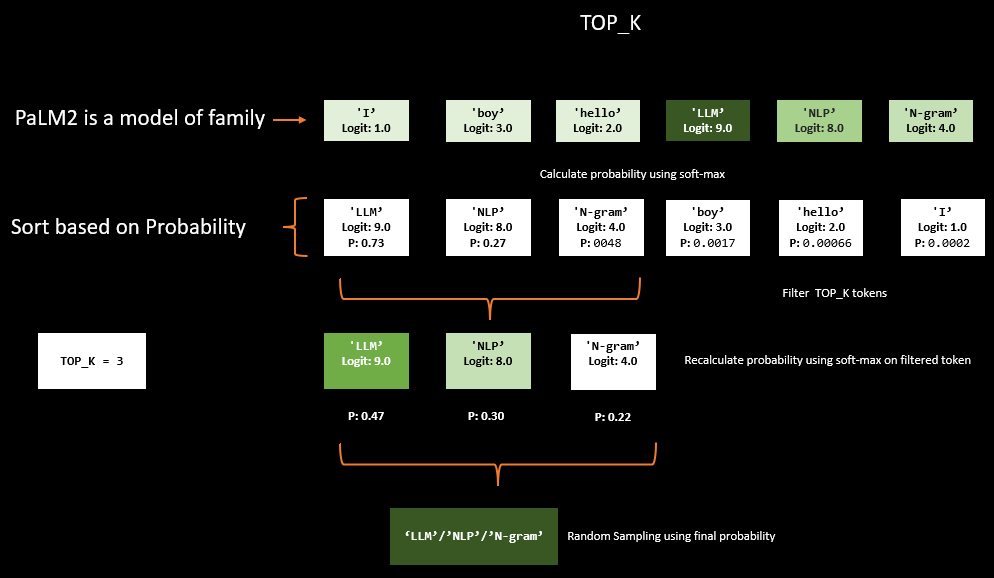

Top K:
Much more simpler ,
1. Sort the tokens based on the probability values.
2. filter the top K tokens to be random sampled for the next words.

Less probably tokens can also be selected in sampling if it falls in the top K tokens.

In [70]:
def top_k_sampling(logits,words,top_k,print_words=False):
    probs = softmax(logits)
    selected_index = np.argsort(probs)[::-1][:top_k]
    top_k_prob = softmax(probs[selected_index])
    if print_words:
        selected_words = []
        for i in selected_index:
            selected_words.append(words[i])
        print('Top K words and Normalized Prob:',list(map(list, zip(selected_words, top_k_prob))))
    random_samp_index = np.random.choice(selected_index,p=top_k_prob)
    print('Sampled word:',words[random_samp_index])

In [71]:
top_k = 3

In [72]:
top_k_sampling(logits,words,top_k,print_words=True)

Top K words and Normalized Prob: [['LLM', 0.47200693217709], ['NLP', 0.29838505834640666], ['N-gram', 0.22960800947650348]]
Sampled word: NLP
